## Problem Statement 1:
1. You have access to the salary information of several employees along with their Years of Experience. Using Linear regression analysis in machine learning, create a linear regression model can predict the salary of an employee based on the years of experience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary = pd.read_csv("data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [118]:
## How many employees having more than 5 years experience are earning more than 60000?
salary.loc[(salary['YearsExperience']>5.0)].shape[0]

14

In [7]:
## How many employees are earning between 50000-80000?
salary.loc[(salary['Salary']> 50000.0) & (salary['Salary']< 80000.0)].shape[0]

12

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

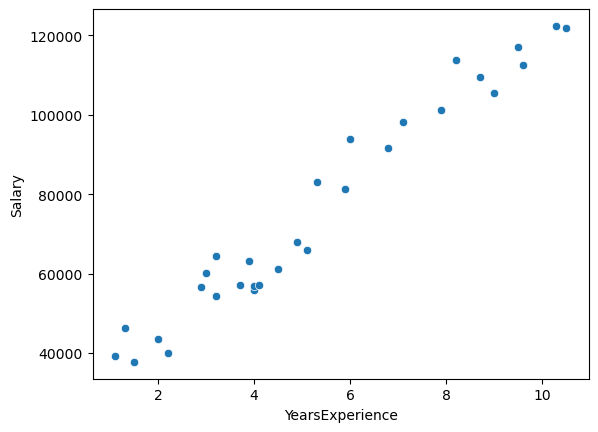

In [17]:
##The scatter plot in the following image shows the relationship between the “YearsExperience” and “Salary” columns. 
sns.scatterplot(x = salary['YearsExperience'], y = salary['Salary'])

**Inference : The plot shows a positive correlation between the ‘YearsExperience” and “Salary”
column.**


(-4.0, 15.0)

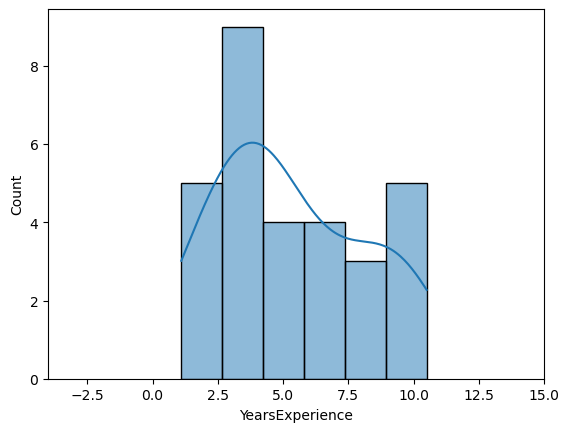

In [19]:
## The distribution plot of the column “YearsExperience” is shown in the image below,what possible inferences can be drawn from the plot.
sns.histplot(salary['YearsExperience'], kde = True)
plt.xlim(-4, 15)

In [20]:
salary['YearsExperience'].skew()

0.37956024064804106

In [21]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array(salary['YearsExperience']).reshape(-1, 1)
y = np.array(salary['Salary']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.4,
                                                   random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9679117063698979

In [60]:
pred_df = pd.DataFrame({"y_true": y_test.reshape(y_test.shape[0]),
             "y_pred": y_pred.reshape(y_pred.shape[0])})
pred_df['residual'] = pred_df['y_true'] - pred_df['y_pred']

pred_df.head()

,y_true,y_pred,residual
0,37731.0,40748.961841,-3017.961841
1,122391.0,122699.622956,-308.622956
2,57081.0,64961.657170,-7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


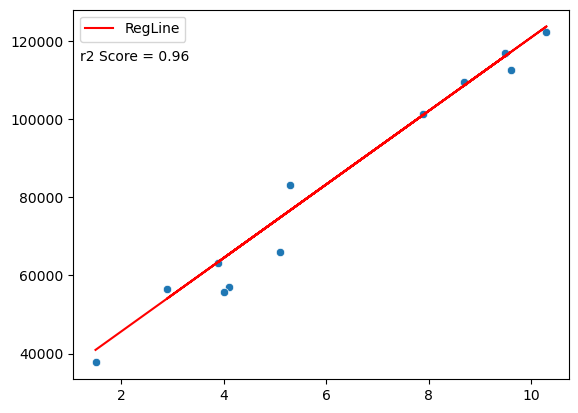

In [73]:
sns.scatterplot(X_test.reshape(X_test.shape[0]), y_test.reshape(y_test.shape[0]))
plt.plot(X_test.reshape(X_test.shape[0]),y_pred.reshape(y_test.shape[0]), color = 'red', label = 'RegLine' )
plt.text(x = 1.2, y = 115000, s = 'r2 Score = 0.96')
plt.legend()

## Problem Statement 2:

2. House prices can be an ever changing trend, but it does change based on certain parameters. You are provided with housing data that has information on various houses and their prices. Use the data at hand to predict the prices of the house using linear regression in machine learning.


In [76]:
df = pd.read_csv("housing.csv", index_col=['id'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Exploration

In [77]:
df.shape

(21613, 20)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [84]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [82]:
df.duplicated().sum()

0

In [86]:
## How many houses have a waterfront?
df['waterfront'].value_counts()[1]

163

In [119]:
## How many houses have 2 floors?
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [104]:
## How many houses built before 1960 have a waterfront?
df.loc[(df['yr_built'] < 1960) & (df['waterfront'] == 1)].shape[0]

80

In [108]:
## What is the price of the most expensive house having more than 4 bathrooms?
df['price'].loc[df['bathrooms']>4.0].max()

7700000

<AxesSubplot:xlabel='price'>

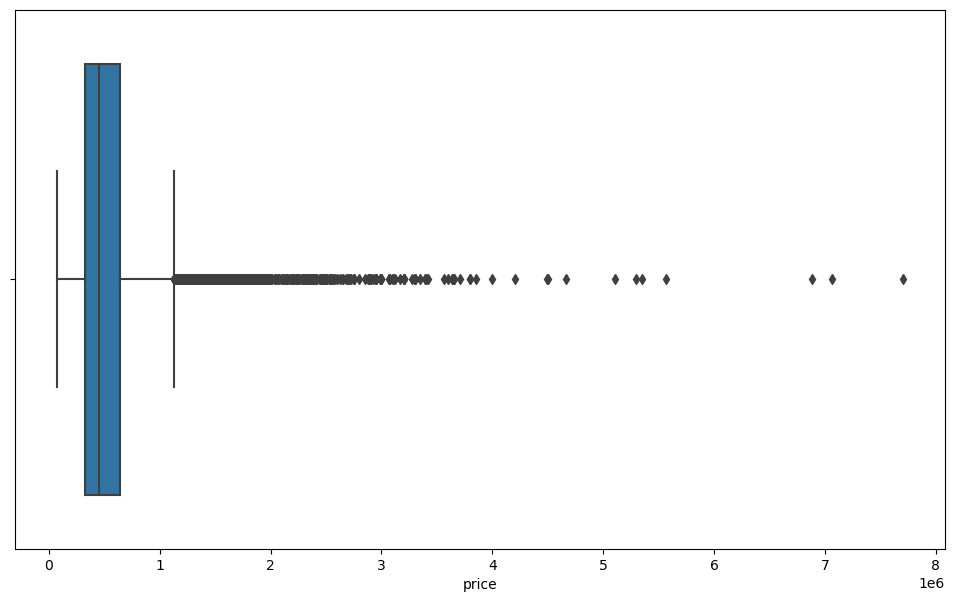

In [112]:
## The image shown below shows the boxplot of the price column from the housing dataset.
plt.figure(figsize = (12,7))
sns.boxplot(x = df['price'])

In [120]:
1-0.38


0.62